# Transfer Learning

### Introduction

We have seen that nowadays, we can throw neural networks at pretty much every problem we face. Classification, detection, regression, generation and many others, they have shown massive improvement by using deep learning.

What about the domains where we can use this? Surely there must be more than computer science. Indeed there are:
1. Medicine - tumor detection: https://arxiv.org/abs/1801.03230
2. Art - generate pictures: https://arxiv.org/abs/1406.2661
3. Finance - fraud detection: https://arxiv.org/abs/1804.07481
4. UI/UX improvements - GUI prototyping: https://arxiv.org/pdf/1802.02312
and many others.

However, a world where we could just throw such a marvelous algorithm at any problem and obtain great results without any prerequisite seems utopian. And indeed it is.

There are 2 severe drawbacks of deep neural nets:
1. they require __massive ammounts of data__
2. they take __an unrealistically long time to train on consumer PCs__


That's where __transfer learning__ comes into play.

### How a convolutional neural network works

We all know how a neural network works. We take our training data, then forward propagate it to the end, calculate the error, then backpropagate and update the weights on each synapse in order to minimize the error.

Well, the way a conv net works is no different. The mechanism is exactly the same. The only difference is in the math. Let's see a high level view of a convnet.

![ConvNet](images/convnet.jpg "ConvNet")

We have a few types of layers:
1. __Convolutional__: it drags a kernel across the whole photo and it calculates the convolution between the pixels in the window and the said kernel.
2. __ReLU__: applies an elementwise max(x, 0), thresholding each value at 0
3. __Pooling__: performs a downsampling along the width and height of each slice of the image
4. __Fully-connected__: at the end, it computes class scores and is then passed through an activation function such as softmax and it gets a distribution of probability across all classes

### How a convolutional layer works

It works by going inside the slices of the current layer(through its depth) and by applying a convolution on all depth layers and a (width, height) shape. Below we have a 2D convolution.

![2dconv](images/2dconv.png "2dconv")

This is how it applies depth-wise to an "image" with multiple layers.

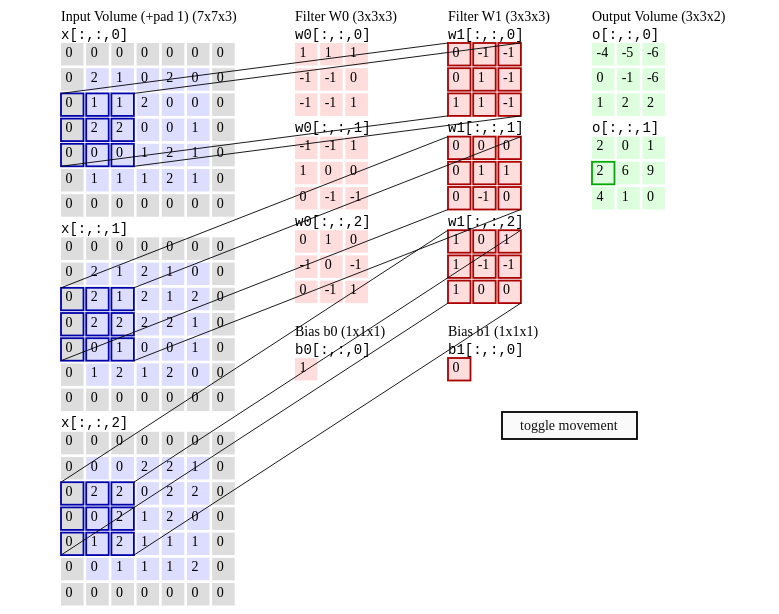

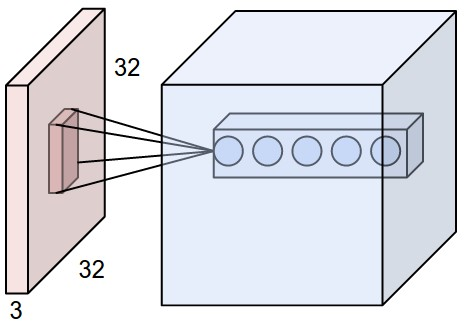

### Why it works

Transfer learning is a way to extract the abstract knowledge from one learning domain or task and reuse of that knowledge in a related domain or taks. This is similar to how humans learn from a very early age.

In __children__, we see this behaviour when they learn to play an instrument. In [this study](http://www.pnas.org/content/113/19/5212), we can see that children who learn how to play music when they are little posses a significant advantage in verbal and lingual learning skills over the ones that don't.
In __adults__, the same behaviour is spotted when we learn languages. The more languages you add to your vocabulary, the easier the next ones are to learn.

This is commonly known as __learning to learn__.

### Differences between the traditional setup and the transfer learning setup

In the __traditional setup__, you get your training data and you build a neural network initialized randomly then perform a number of epochs of forward/backward propagation in which you modify the weights of each neuron in order to minimize the loss function of your choice.
![Traditional setup](images/traditional_ml_setup.png "Traditional setup")

In a __transfer learning__ setup, you get a __trained__ neural network and through some process, you reuse those weights for your new task.
![Transfer learning setup](images/transfer_learning_setup.png "Transfer learning setup")

### How it works

There are 3 major transfer learning scenarios used in practice(sorted by the ammount of data and time needed to train):
1. __Pretrained models__: Require no new data or time to train. Just take a pretrained network(VGG16, Inception, ResNet etc.) and throw an input image at it and read the output distribution.
2. __ConvNet as fixed feature extractor__: Require a moderate amount of data and time. Suppose you take a ConvNet pretrained on ImageNet(a large image dataset containing 1000 classes). You want to specialize this network on 3 new classes of your own desire. What you do is you take out the last fully connected layer(the one that gives the distribution over the 1000 classes) and instead add a new fully connected layer of with the size equal to the new number of classes and randomly initialize it. Afterwards, you freeze the rest of the network and simply do backprop on the new layer.
3. __Fine-tuning the ConvNet__: Most intensive computationally and data hungry. Same action as the above regarding the last layer, but now you do backprop throughout the whole network(or a larger part of the network instead of only the last layer).

The biggest benefit of using any of the above methods is that we drastically __improve training time__ and __reduce the massive of amount of data__ needed to train a neural network(__>1.000.000 examples__) to the order of thousands-tens of __thousands__ needed to specialize.

![Transfer learning](images/newalexnet.png)

### Why it works

##### What does this have to do with neural nets?

ConvNets came to exist because of the need to process bigger images. You can't unroll a 512x512 image and put it through a full-connected layer. It would require 512x512x(fully-connected size) to update. And this is only one layer. It's obvious that it doesn't scale well. By applying strided kernels, we can capture local parts of the image and retain enough information to obtain a good(if not better) inference accuracy.

Now let's take a look inside the weights of the first few layers of the AlexNet network(trained on the ImageNet dataset). Why does it work? __Because a ConvNet builds the inference hierarchically, from base features to more complex ones and every image shares the same basic features__. What this means is that we can share the weights(as in sharing the knowledge) between two neural networks and then specialize for our classes and have it be advantageous.

![weights.jpeg](images/weights.jpeg)

## That's how transfer learning works. Time to practice.

For today, I have prepared a small and fun practical exercise that we can all do on our personal laptops.
1. First we will collect some data. The data we will get consists of images of our 3 positions of each one's thumb: __pointing up, horizontal and pointing down__, about 2000 pics of each.
2. We will train a neural network(or at least attempt) with just these pictures - and fail terribly
3. We will apply the last 2 methods of transfer learning and compare the results.

# References

1. http://cs231n.github.io/understanding-cnn/
2. http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture12.pdf
3. http://cs231n.github.io/convolutional-networks/
4. https://en.wikipedia.org/wiki/Visual_cortex
5. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
6. https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
7. https://opencv.org/